## $JanataHack: Machine Learning for Banking$

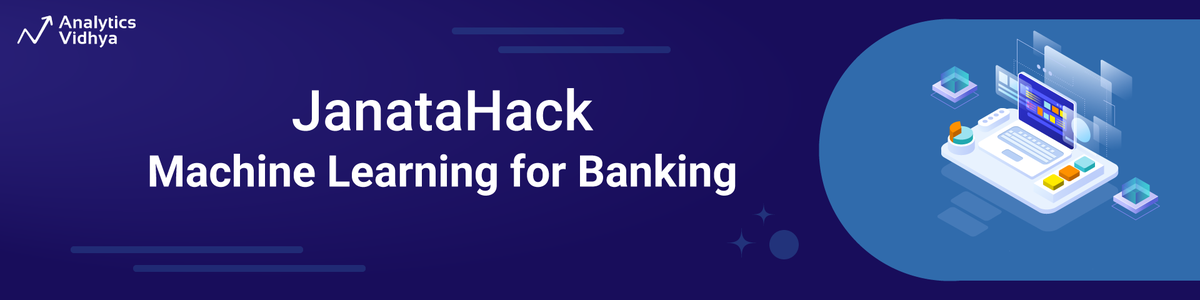

**Problem Statement**

Have you ever wondered how lenders use various factors such as credit score, annual income, the loan amount approved, tenure, debt-to-income ratio etc. and select your interest rates? 

The process, defined as ‘risk-based pricing’, uses a sophisticated algorithm that leverages different determining factors of a loan applicant. Selection of significant factors will help develop a prediction algorithm which can estimate loan interest rates based on clients’ information. On one hand, knowing the factors will help consumers and borrowers to increase their credit worthiness and place themselves in a better position to negotiate for getting a lower interest rate. On the other hand, this will help lending companies to get an immediate fixed interest rate estimation based on clients information. Here, your goal is to use a training dataset to predict the loan rate category (1 / 2 / 3) that will be assigned to each loan in our test set.

You can use any combination of the features in the dataset to make your loan rate category predictions. Some features will be easier to use than others.

**Evaluation Metric**

The evaluation metric for this competition is Weighted F1 Score.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
## Loading train and test Data
train_data = pd.read_csv(r'G:\DATASETS\Analytics Vidya\BANK\train.csv')
test_data = pd.read_csv(r'G:\DATASETS\Analytics Vidya\BANK\test.csv')
train_data.drop('Loan_ID',axis=1 ,inplace=True)
ID = test_data['Loan_ID']
test_data.drop('Loan_ID',axis=1 ,inplace=True)

In [6]:
train_data.sample()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
95150,"30,225",3 years,Mortgage,63000.0,VERIFIED - income,credit_card,13.73,1,NaN,7,18,Male,2


In [4]:
#train_data.describe()

In [7]:
missing_columns = train_data.columns[train_data.isna().sum() >1]
missing_columns

Index(['Length_Employed', 'Home_Owner', 'Annual_Income',
       'Months_Since_Deliquency'],
      dtype='object')

In [6]:
train_data.Length_Employed.value_counts()

10+ years    52915
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: Length_Employed, dtype: int64

In [8]:
train_data.Length_Employed.unique()

array(['< 1 year', '4 years', '7 years', '8 years', '2 years',
       '10+ years', '1 year', nan, '6 years', '9 years', '3 years',
       '5 years'], dtype=object)

In [9]:
##filling missing values
test_data.Length_Employed.fillna(train_data.Length_Employed.mode()[0],inplace=True)
train_data.Length_Employed.fillna(train_data.Length_Employed.mode()[0],inplace=True)

In [10]:
len(train_data)

164309

In [11]:
train_data.isna().sum()

Loan_Amount_Requested          0
Length_Employed                0
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [12]:
88379*100/164309 ##filling missing values percentage of Months_Since_Deliquency column

53.788289138148244

In [13]:
25349*100/164309 ##filling missing values percentage of Home_Owner and Annual_Income

15.42763938676518

In [14]:
train_data.Home_Owner.value_counts()

Mortgage    70345
Rent        56031
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64

In [15]:
##filling missing values
test_data.Home_Owner.fillna(train_data.Home_Owner.mode()[0],inplace=True)
train_data.Home_Owner.fillna(train_data.Home_Owner.mode()[0],inplace=True)

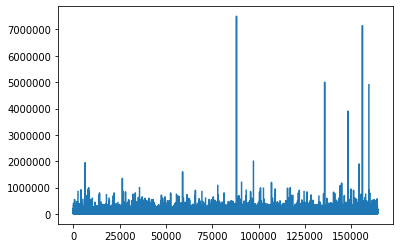

In [16]:
train_data.Annual_Income.plot()

In [17]:
train_data.Annual_Income.mean()

73331.15943386468

In [18]:
train_data.Annual_Income.median()

63000.0

In [19]:
##filling missing values
test_data.Annual_Income.fillna(train_data.Annual_Income.median(),inplace=True)
train_data.Annual_Income.fillna(train_data.Annual_Income.median(),inplace=True)

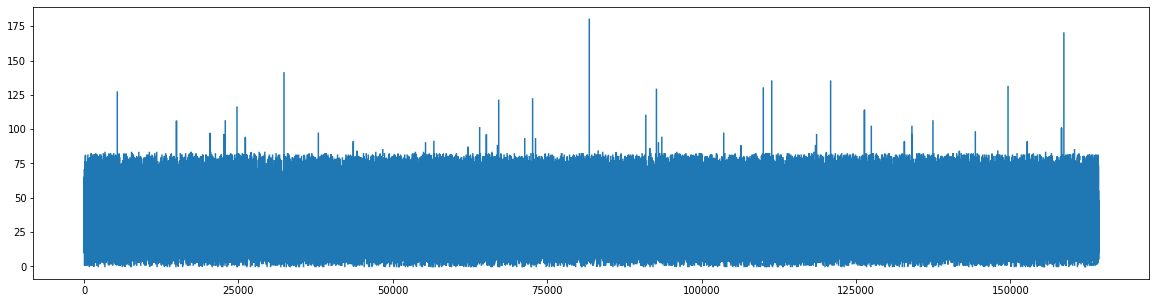

In [20]:
train_data.Months_Since_Deliquency.plot(figsize=(20,5))

In [21]:
train_data.Months_Since_Deliquency.mean() 

34.22935598577637

In [22]:
train_data.Months_Since_Deliquency.median()  

31.0

In [23]:
##filling missing values
test_data.Months_Since_Deliquency.fillna(train_data.Months_Since_Deliquency.mean(),inplace=True)
train_data.Months_Since_Deliquency.fillna(train_data.Months_Since_Deliquency.mean(),inplace=True)

In [24]:
test_data.isna().sum()

Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
dtype: int64

In [25]:
##converting object to int after removing ',' value from the value(because of its money value so we are cleaning the value)
import re
train_data['Loan_Amount_Requested']=train_data.Loan_Amount_Requested.apply(lambda x:int(re.sub(r',','',x)))
test_data['Loan_Amount_Requested']=test_data.Loan_Amount_Requested.apply(lambda x:int(re.sub(r',','',x)))

In [26]:
##finding the numerical and categrical vaues
numeric_columns = [col for col in train_data.columns if train_data[col].dtype in ['float','int64'] ]
category_columns = [col for col in train_data.columns if train_data[col].dtype =='O' ]

In [27]:
train_data[numeric_columns].head()

,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
0,7000,68000.0,18.37,0,34.229356,9,14,1
1,30000,63000.0,14.93,0,17.000000,12,24,3
2,24725,75566.4,15.88,0,34.229356,12,16,3
3,16000,56160.0,14.34,3,34.229356,16,22,3
4,17000,96000.0,22.17,1,34.229356,19,30,1


In [28]:
train_data.Inquiries_Last_6Mo.unique()

array([0, 3, 1, 2, 4, 5, 6, 7, 8], dtype=int64)

In [29]:
train_data[category_columns].head()

,Length_Employed,Home_Owner,Income_Verified,Purpose_Of_Loan,Gender
0,< 1 year,Rent,not verified,car,Female
1,4 years,Mortgage,VERIFIED - income,debt_consolidation,Female
2,7 years,Mortgage,VERIFIED - income source,debt_consolidation,Male
3,< 1 year,Mortgage,VERIFIED - income source,debt_consolidation,Male
4,8 years,Own,VERIFIED - income source,debt_consolidation,Female


In [30]:
train_data.Length_Employed.unique()

array(['< 1 year', '4 years', '7 years', '8 years', '2 years',
       '10+ years', '1 year', '6 years', '9 years', '3 years', '5 years'],
      dtype=object)

In [31]:
## conver the object values into int  values Ex : '< 1 year' into 0 and '4 years' into 4.
def Clean(text):
    if text[0] == '<':
        text = re.sub('\D+','',text)
        text = int(text)-1
    else:
        text = int(re.sub('\D+','',text))
    return text

train_data.Length_Employed =  train_data.Length_Employed.apply(lambda x:Clean(x))
test_data.Length_Employed =  test_data.Length_Employed.apply(lambda x:Clean(x))
train_data.Length_Employed.unique()

array([ 0,  4,  7,  8,  2, 10,  1,  6,  9,  3,  5], dtype=int64)

In [33]:
##columns which are need to create dummy values or one hot encoder
dummy_columns = ['Home_Owner','Income_Verified','Purpose_Of_Loan','Gender']

In [34]:
## cretating dummies for few columns
train_dummi = pd.get_dummies(train_data,columns=dummy_columns,drop_first=True)
test_dummi = pd.get_dummies(test_data,columns=dummy_columns,drop_first=True)

In [35]:
train_dummi.shape,test_dummi.shape

((164309, 29), (109541, 28))

In [36]:
train_dummi.head()

,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate,Home_Owner_None,...,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Male
0,7000,0,68000.0,18.37,0,34.229356,9,14,1,0,...,0,0,0,0,0,0,0,0,0,0
1,30000,4,63000.0,14.93,0,17.000000,12,24,3,0,...,0,0,0,0,0,0,0,0,0,0
2,24725,7,75566.4,15.88,0,34.229356,12,16,3,0,...,0,0,0,0,0,0,0,0,0,1
3,16000,0,56160.0,14.34,3,34.229356,16,22,3,0,...,0,0,0,0,0,0,0,0,0,1
4,17000,8,96000.0,22.17,1,34.229356,19,30,1,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
from sklearn.model_selection import train_test_split,cross_validate,RandomizedSearchCV,GridSearchCV,KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier,SGDClassifier,RidgeClassifier
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [38]:
##Creating independent(X) and dependent(y) variables  
X = train_dummi.drop('Interest_Rate',axis=1)
y= train_dummi['Interest_Rate']

##split the data for testing and training with 25% test size
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y)

##### Bulding Models without scaling

In [41]:
RFC_d = RandomForestClassifier()
RFC_d.fit(X_train,y_train)
pred_ref = RFC_d.predict(X_test)
print('accuracy_score :',accuracy_score(y_test,pred_ref))
print('f1_score :',f1_score(y_test,pred_ref,average='weighted'))

accuracy_score : 0.513364818150835
f1_score : 0.5036148590856205


In [42]:
adc_d = AdaBoostClassifier()
adc_d.fit(X_train,y_train)
pred_abc = adc_d.predict(X_test)
print('accuracy_score :',accuracy_score(y_test,pred_abc))
print('f1_score:',f1_score(y_test,pred_abc,average='weighted'))

accuracy_score : 0.5287258386484249
f1_score: 0.5146237799914063


In [43]:
GBC_d = GradientBoostingClassifier()
GBC_d.fit(X_train,y_train)
pred_gbc = GBC_d.predict(X_test)
print('accuracy_score :',accuracy_score(y_test,pred_gbc))
print('f1_score',f1_score(y_test,pred_gbc,average='weighted'))

accuracy_score : 0.5318175178927893
f1_score 0.5129238526303844


### scaling

In [44]:
#StandardScaler 
scale_std = StandardScaler()
X_train_std = scale_std.fit_transform(X_train)
X_test_std = scale_std.transform(X_test)

In [45]:
RFC_std = RandomForestClassifier()
RFC_std.fit(X_train_std,y_train)
pred_rfcstd = RFC_std.predict(X_test_std)
print('accuracy_score :',accuracy_score(y_test,pred_rfcstd))
print('f1_score:',f1_score(y_test,pred_rfcstd,average='weighted'))

accuracy_score : 0.5139003846341107
f1_score: 0.5034469303267602


In [46]:
ABC_std = AdaBoostClassifier()
ABC_std.fit(X_train_std,y_train)
pred_abcstd = ABC_std.predict(X_test_std)
print('accuracy_score :',accuracy_score(y_test,pred_abcstd))
print('f1_score :',f1_score(y_test,pred_abcstd,average='weighted'))

accuracy_score : 0.5287258386484249
f1_score : 0.5146237799914063


In [47]:
GBC_std = GradientBoostingClassifier()
GBC_std.fit(X_train_std,y_train)
pred_gbcstd = GBC_std.predict(X_test_std)
print('accuracy_score :',accuracy_score(y_test,pred_gbcstd))
print('f1_score :',f1_score(y_test,pred_gbcstd,average='weighted'))

accuracy_score : 0.5318175178927893
f1_score : 0.5129238526303844


In [48]:
## MinMax scaling
scale_min = MinMaxScaler()
X_train_min = scale_min.fit_transform(X_train)
X_test_min = scale_min.transform(X_test)

In [49]:
RFC_min = RandomForestClassifier()
RFC_min.fit(X_train_min,y_train)
pred_rfcmin = RFC_min.predict(X_test_min)

print('accuracy_score :',accuracy_score(y_test,pred_rfcmin))
print('f1_score :',f1_score(y_test,pred_rfcmin,average='weighted'))

accuracy_score : 0.5156044598081698
f1_score : 0.5054072721123098


In [50]:
ABC_min = AdaBoostClassifier()
ABC_min.fit(X_train_min,y_train)
pred_abcmin = ABC_min.predict(X_test_min)
print('accuracy_score :',accuracy_score(y_test,pred_abcmin))
print('f1_score :',f1_score(y_test,pred_abcmin,average='weighted'))

accuracy_score : 0.5287258386484249
f1_score : 0.5146237799914063


In [51]:
GBC_min = GradientBoostingClassifier()
GBC_min.fit(X_train_min,y_train)
pred_gbcmin = GBC_min.predict(X_test_min)
print('accuracy_score :',accuracy_score(y_test,pred_gbcmin))
print('f1_score :',f1_score(y_test,pred_gbcmin,average='weighted'))

accuracy_score : 0.5318175178927893
f1_score : 0.5129238526303844


### XgBoost Model

In [52]:
import xgboost
clf = xgboost.XGBClassifier()

In [53]:
clf.fit(X_train,y_train)
pred_xgd = clf.predict(X_test)

print('accuracy_score :',accuracy_score(y_test,pred_xgd))
print('f1_score :',f1_score(y_test,pred_xgd,average='weighted'))

accuracy_score : 0.5398266712108671
f1_score : 0.5300705888691449


#### KFold Crossvalidation 

In [56]:
kf  = KFold(n_splits=10)
scores = []
pred_test = []
model = xgboost.XGBClassifier()
i=1
for train_index ,test_index in kf.split(X):
    #print('Train index:',train_index,'Cross_validation index:',test_index)
    X_train_cv = X.iloc[train_index]
    X_test_cv = X.iloc[test_index]
    
    y_train_cv = y.iloc[train_index]
    y_test_cv = y.iloc[test_index]
    
    model.fit(X_train_cv,y_train_cv)
    
    pred = model.predict(X_test_cv)
    
    print('validation data f1_score after {} split'.format(i),f1_score(y_test_cv,pred,average='weighted'))
    i +=1
    scores.append(f1_score(y_test_cv,pred,average='weighted'))
    
    test_predictions = model.predict(test_dummi)
    pred_test.append(test_predictions)

validation data f1_score after 1 split 0.5269554363085415
validation data f1_score after 2 split 0.53049683574206
validation data f1_score after 3 split 0.5331481470269394
validation data f1_score after 4 split 0.530116068032515
validation data f1_score after 5 split 0.5368064694846226
validation data f1_score after 6 split 0.5352250301511157
validation data f1_score after 7 split 0.5309300305773964
validation data f1_score after 8 split 0.539432882375764
validation data f1_score after 9 split 0.527984794163073
validation data f1_score after 10 split 0.5339846083519497


In [57]:
scores

[0.5269554363085415,
 0.53049683574206,
 0.5331481470269394,
 0.530116068032515,
 0.5368064694846226,
 0.5352250301511157,
 0.5309300305773964,
 0.539432882375764,
 0.527984794163073,
 0.5339846083519497]

In [58]:
## making combining of  of all the models out put 
from scipy.stats import mode
pred1 = mode(pred_test,0)

In [156]:
dataframe = pd.DataFrame({'Loan_ID':ID,'Interest_Rate':pred1.mode[0]})
dataframe.to_csv('submission_cv10.csv',index=False)

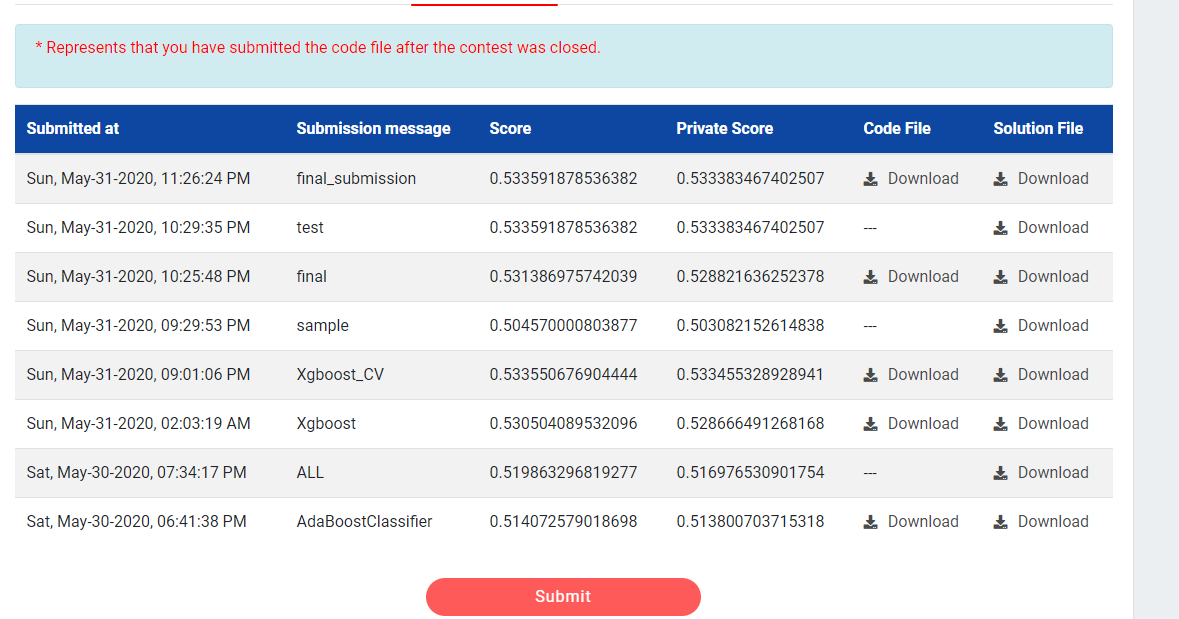

In [63]:
from IPython.display import Image 
Image('G:\DATASETS\Analytics Vidya\BANK\submissions.PNG')

In [ ]:
from IPython.display import Image 
Image('G:\DATASETS\Analytics Vidya\BANK\submissions.PNG')